## Exploring Image Soustraction 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import utils
import os
import tifffile
from sklearn.cluster import KMeans

First we import some images to work with

In [2]:

def get_tiles_as_array(folder):
    band_list = ['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11','B12']
    path = 'data/'+ folder
    folder_list = os.listdir(path)
    m,n = 600,1400
    array = np.zeros((m,n,len(band_list)))

    i = 0
    for band in band_list:
        for wanted_band in folder_list:
            if band in wanted_band:
                print(wanted_band)
                img = tifffile.imread(os.path.join(path,wanted_band))
                array[:,:,i] = img[:m,:n]
                i+=1
    return array

In [44]:
arrayM1 = get_tiles_as_array('Mytilene/M1')
print(arrayM1.shape)

bands = ['B01','B02','B03','B04','B05','B06','B07','B08','B8A','B09','B11','B12' ]
def show_array(array):
    plt.figure(figsize=(15,8*array.shape[2]))
    for i, b in zip(range(array.shape[2]), bands):
        plt.subplot(array.shape[2],1,i+1)
        plt.imshow(array[:,:,i])
        plt.xlabel(f'Bande {b}')
    plt.show
def show_image(img, title="image"):
    plt.figure(figsize=(14,6))
    plt.imshow(img)
    plt.title(title)
    plt.colorbar()
    plt.show()
    
# show_array(arrayM1)

2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B01_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B02_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B03_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B04_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B05_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B06_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B07_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B08_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B8A_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B09_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B11_(Raw).tiff
2019-06-07-00_00_2019-06-07-23_59_Sentinel-2_L2A_B12_(Raw).tiff
(600, 1400, 12)


We are going to work with the B04 image

(600, 1400)


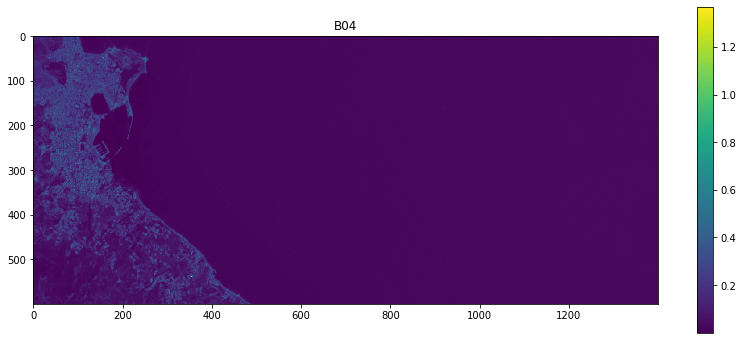

In [45]:
img = arrayM1[...,3]
print(img.shape)
show_image(img, 'B04')

Let us first display the region of interest !

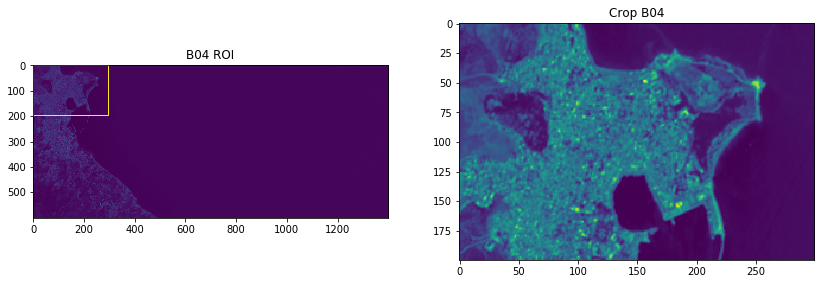

In [50]:
def mark_boundaries(img, ROI, linewidth):
    # crop the image
    crop = np.copy(img)[ROI[0][0]:ROI[1][0],ROI[0][1]:ROI[1][1]]
    # mark boudaries
    img_with_boudaries = np.copy(img)
    inside = np.copy(img_with_boudaries[ROI[0][0]+linewidth:ROI[1][0]-linewidth,ROI[0][1]+linewidth:ROI[1][1]-linewidth])
    img_with_boudaries[ROI[0][0]:ROI[1][0],ROI[0][1]:ROI[1][1]] = 2
    img_with_boudaries[ROI[0][0]+linewidth:ROI[1][0]-linewidth,ROI[0][1]+linewidth:ROI[1][1]-linewidth] = inside
    return img_with_boudaries, crop

def show_2_images(img1, img2, ttl1, ttl2):
    plt.figure(figsize=(14,6))
    plt.subplot(121)
    plt.imshow(img1)
    plt.title(ttl1)
    plt.subplot(122)
    plt.imshow(img2)
    plt.title(ttl2)
    plt.show()

ROI = [[0, 0],[200, 300]]
img_with_boudaries, crop = mark_boundaries(img, ROI, 5)
show_2_images(img_with_boudaries, crop, 'B04 ROI', 'Crop B04')

## Fist difference - Horizontal

We substract for each pixel the pixel that is directly to the right. We account for padding, so that the pixel on the right edge are either deleted or their initial value


In [55]:
def difference_h(img, padding = True):
    diff_h = img[:,:-1]-img[:,1:] if (padding==True) else img-np.concatenate((img[:,1:], np.zeros((img.shape[0],1))), axis=1)
    return diff_h

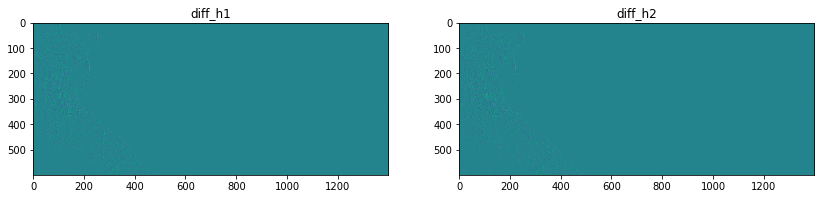

In [57]:
diff_h1 = difference_h(img, padding = True)
diff_h2 = difference_h(img, padding = False)
show_2_images(diff_h1, diff_h2, 'diff_h1', 'diff_h2')

## Fist difference - Vertical